**Link to the challenge can be found [here](https://data-puzzles.com/challenges/speed-limit/).**

**Link to the Google collab can be found [here](https://colab.research.google.com/drive/14GM-bSjUm5R5d_GkuWSUNCpH1dPSYXxC?usp=sharing#scrollTo=HD8XFWVyI7Y-).**

# Intro

The dataset loaded below represents a random sample of cars speed on certain roads.

Can you figure out what the speed limit is for each road?
Write back the sum of all roads speeds limits back on the data-puzzles webpage!

# Kickstart

In [4]:
import pandas as pd

speeds_df = pd.read_csv('https://raw.githubusercontent.com/hyperc54/data-puzzles-assets/master/visualisation/speeds_data.csv')

In [5]:
speeds_df.head()

,plate,road,speed
0,DN9166SU,R87,49.7
1,CG4862ZS,R87,49.4
2,DV4956AM,R87,49.9
3,TL4125OA,R87,51.3
4,LX3827BI,R87,48.1


# Attempt

In [7]:
speeds_df.groupby(by = 'road')['speed'].mean()

road
R17     86.605333
R48     67.118778
R77    122.422083
R80     28.766455
R87     47.857176
R90     96.589000
Name: speed, dtype: float64

These means seem too high. We can, instead, plot a histogram of each instance per road.

In [9]:
import matplotlib.pyplot as plt

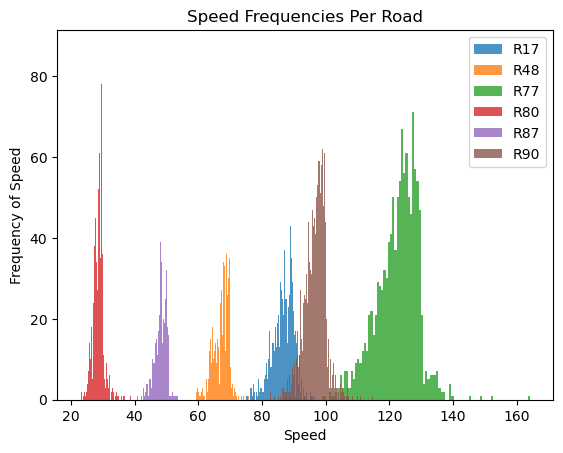

In [10]:
for road, group in speeds_df.groupby('road'):
    plt.hist(group['speed'], bins=100, alpha=0.8, label=road)
# alternatively [plt.hist(group['speed'], bins=100, alpha=0.8, label=road) for road, group in speeds_df.groupby('road')]
plt.xlabel('Speed')
plt.ylabel('Frequency of Speed')
plt.title('Speed Frequencies Per Road')
plt.legend()
plt.show()

# alternatively with seaborn
# import seaborn as sns
# sns.histplot(data = speeds_df, x = 'speed', hue = 'road', bins = 100)

If we want to plot each individually, we should set up subplots.

In [33]:
import numpy as np

speeds_df['road'].unique()[0][1:]
roads_ordered = np.array([road[1:] for road in speeds_df['road'].unique()])
roads_ordered = roads_ordered.astype(int)

In [37]:
roads_ordered.sort()
roads_ordered = [f"R{road}" for road in roads_ordered]
roads_ordered

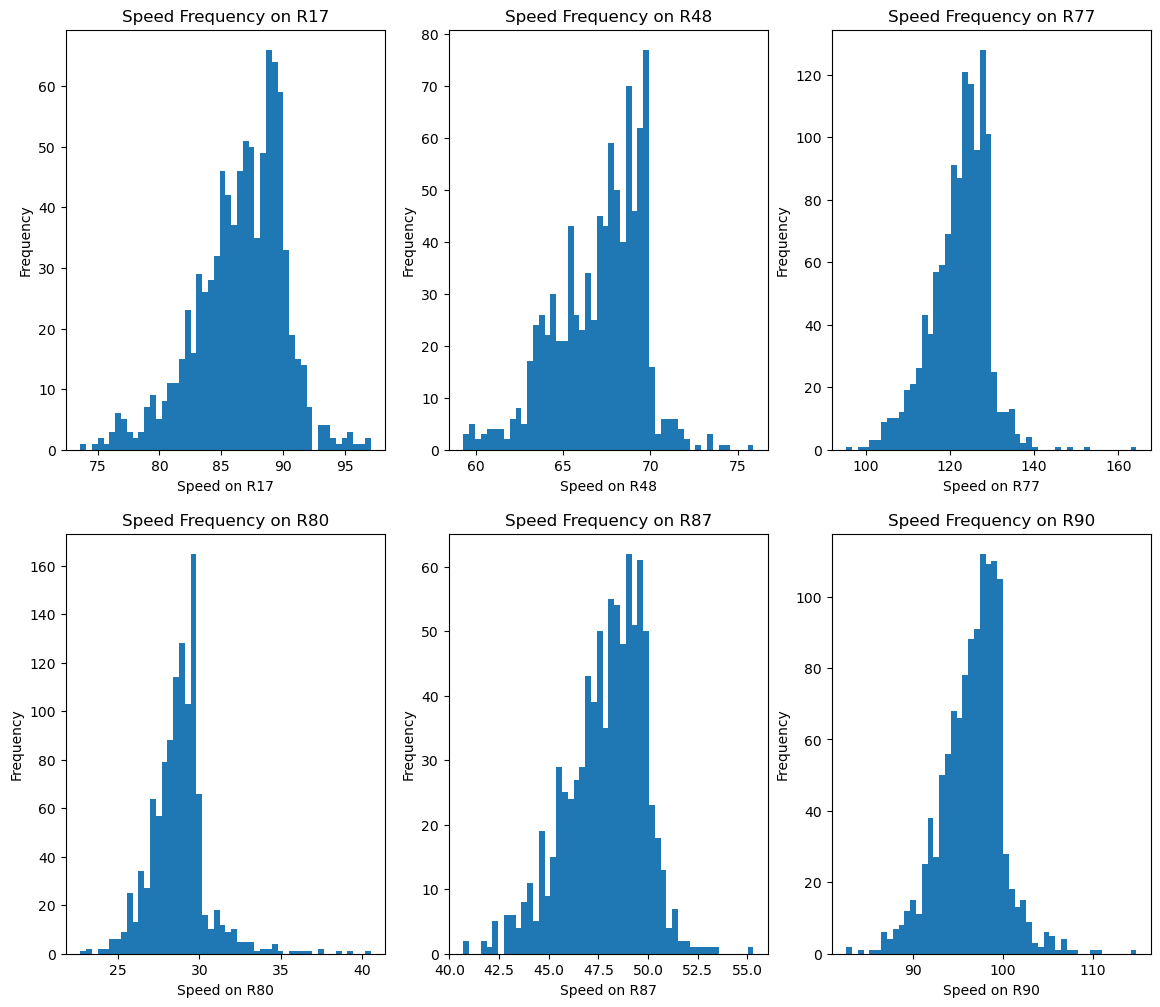

In [45]:
fig, ax = plt.subplots(2, 3, figsize = (14, 12))
ax = ax.flatten()
for i in range(len(roads_ordered)):
    specific_road = roads_ordered[i]
    ax[i].hist(speeds_df[speeds_df['road'] == specific_road]['speed'], bins = 50)
    ax[i].set_xlabel(f"Speed on {specific_road}")
    ax[i].set_ylabel(f"Frequency")
    ax[i].set_title(f"Speed Frequency on {specific_road}")

Looking at the graphs above, it seems most likely:
- R17: Speed Limit 90
- R48: Speed Limit 70
- R77: Speed Limit 130 or 135
- R80: Speed Limit 30
- R87: Speed Limit 50
- R90: Speed Limit 100

We should also look at the percentiles

R17 - Mean: 86.60533333333333
R17 - 95th Percentile: 94.406

R48 - Mean: 67.11877777777777
R48 - 95th Percentile: 71.90100000000001

R77 - Mean: 122.42208333333333
R77 - 95th Percentile: 136.106

R80 - Mean: 28.766454545454543
R80 - 95th Percentile: 34.7

R87 - Mean: 47.85717647058822
R87 - 95th Percentile: 51.651

R90 - Mean: 96.58899999999998
R90 - 95th Percentile: 105.501



In [48]:
# alternatively, use groupby

# def find_95th(data):
#     return np.percentile(data, 95)

# speeds_df.groupby('road')['speed'].agg([np.mean, np.median, find_95th])

# for name, group in speeds_df.groupby('road'):
#     print(f"{name} - Mean: {np.mean(group['speed'])}")
#     print(f"{name} - 95th Percentile: {np.percentile(group['speed'], 99)}\n")

These numbers are quite consistent with our guesses from the histogram. As such, we have reason to be confident of our answer above.